In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

#Import OS
import os

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54dc51afe3cfc555d7e0ae9a1f8344af


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 1 | burnie
Processing Record 3 of Set 1 | port augusta
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | kautokeino
Processing Record 11 of Set 1 | pangnirtung
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | vanimo
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | eufaula
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | roma
Processing Re

Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | flinders
Processing Record 39 of Set 4 | walvis bay
Processing Record 40 of Set 4 | shenjiamen
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | naryan-mar
Processing Record 45 of Set 4 | caconda
Processing Record 46 of Set 4 | sistranda
Processing Record 47 of Set 4 | casper
Processing Record 48 of Set 4 | bonnyville
Processing Record 49 of Set 4 | santa maria
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | grand gaube
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | lasa
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | matias romero
Processing Record 6 of Set 5 | salinas
Processing Record 7 of Set 5 | diplo
Processing Record 8 of Set 5 | mehamn
Processing Record 9 of Set 5 | ajdabiya
Processing Record 10 of Se

Processing Record 32 of Set 8 | chapleau
Processing Record 33 of Set 8 | bathsheba
Processing Record 34 of Set 8 | bonthe
Processing Record 35 of Set 8 | kamenka
Processing Record 36 of Set 8 | anaconda
Processing Record 37 of Set 8 | west fargo
Processing Record 38 of Set 8 | atar
Processing Record 39 of Set 8 | biak
Processing Record 40 of Set 8 | khawhai
Processing Record 41 of Set 8 | mporokoso
Processing Record 42 of Set 8 | asyut
Processing Record 43 of Set 8 | yugorsk
Processing Record 44 of Set 8 | el campo
Processing Record 45 of Set 8 | dalmatovo
Processing Record 46 of Set 8 | muswellbrook
Processing Record 47 of Set 8 | sumbe
Processing Record 48 of Set 8 | maniitsoq
Processing Record 49 of Set 8 | nettetal
Processing Record 50 of Set 8 | kulhudhuffushi
Processing Record 1 of Set 9 | boali
Processing Record 2 of Set 9 | santa isabel do rio negro
Processing Record 3 of Set 9 | piopio
Processing Record 4 of Set 9 | sabirabad
Processing Record 5 of Set 9 | rancharia
Processing

Processing Record 20 of Set 12 | pati
Processing Record 21 of Set 12 | montreal
Processing Record 22 of Set 12 | kinshasa
Processing Record 23 of Set 12 | sola
Processing Record 24 of Set 12 | sampit
Processing Record 25 of Set 12 | longview
Processing Record 26 of Set 12 | rodez
Processing Record 27 of Set 12 | chagda
City not found. Skipping...
Processing Record 28 of Set 12 | seddon
Processing Record 29 of Set 12 | hammerfest
Processing Record 30 of Set 12 | trinidad
Processing Record 31 of Set 12 | dinghai
Processing Record 32 of Set 12 | east wenatchee bench
Processing Record 33 of Set 12 | itarema
Processing Record 34 of Set 12 | san matias
Processing Record 35 of Set 12 | portland
Processing Record 36 of Set 12 | waipawa
Processing Record 37 of Set 12 | deputatskiy
Processing Record 38 of Set 12 | gangotri
City not found. Skipping...
Processing Record 39 of Set 12 | evensk
Processing Record 40 of Set 12 | fukue
Processing Record 41 of Set 12 | katha
City not found. Skipping...
P

In [7]:
len(city_data)

550

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Antofagasta,-23.65,-70.40,73.40,64,20,17.22,CL,2020-02-22 19:15:54
1,Burnie,-41.07,145.92,55.99,96,74,4.00,AU,2020-02-22 19:19:03
2,Port Augusta,-32.50,137.77,61.00,82,0,4.70,AU,2020-02-22 19:19:03
3,Hermanus,-34.42,19.23,64.99,99,100,1.01,ZA,2020-02-22 19:19:03
4,Kavieng,-2.57,150.80,83.25,74,22,5.75,PG,2020-02-22 19:19:04
5,Mar Del Plata,-38.00,-57.56,69.01,63,20,10.29,AR,2020-02-22 19:17:52
6,Vaini,-21.20,-175.20,77.00,94,75,6.93,TO,2020-02-22 19:19:04
7,Busselton,-33.65,115.33,66.99,66,3,9.40,AU,2020-02-22 19:19:04
8,Kautokeino,69.01,23.04,25.12,91,22,22.68,NO,2020-02-22 19:19:04
9,Pangnirtung,66.15,-65.71,-32.80,59,5,2.73,CA,2020-02-22 19:19:04


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Antofagasta,CL,2020-02-22 19:15:54,-23.65,-70.40,73.40,64,20,17.22
1,Burnie,AU,2020-02-22 19:19:03,-41.07,145.92,55.99,96,74,4.00
2,Port Augusta,AU,2020-02-22 19:19:03,-32.50,137.77,61.00,82,0,4.70
3,Hermanus,ZA,2020-02-22 19:19:03,-34.42,19.23,64.99,99,100,1.01
4,Kavieng,PG,2020-02-22 19:19:04,-2.57,150.80,83.25,74,22,5.75
5,Mar Del Plata,AR,2020-02-22 19:17:52,-38.00,-57.56,69.01,63,20,10.29
6,Vaini,TO,2020-02-22 19:19:04,-21.20,-175.20,77.00,94,75,6.93
7,Busselton,AU,2020-02-22 19:19:04,-33.65,115.33,66.99,66,3,9.40
8,Kautokeino,NO,2020-02-22 19:19:04,69.01,23.04,25.12,91,22,22.68
9,Pangnirtung,CA,2020-02-22 19:19:04,66.15,-65.71,-32.80,59,5,2.73


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582399250.112704

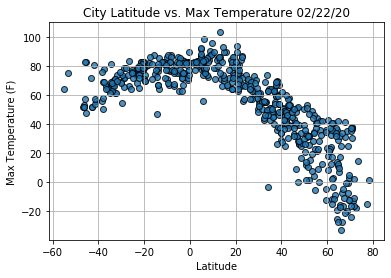

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

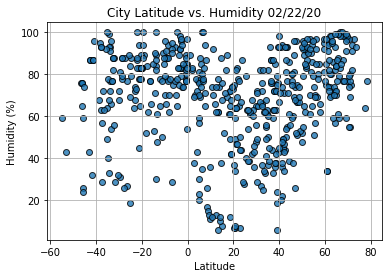

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

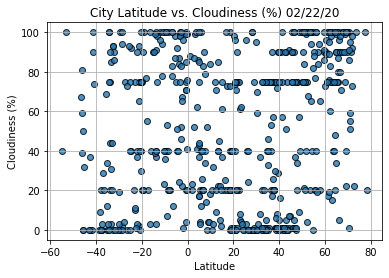

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

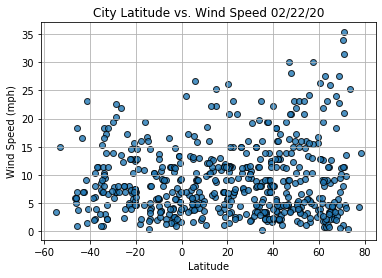

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

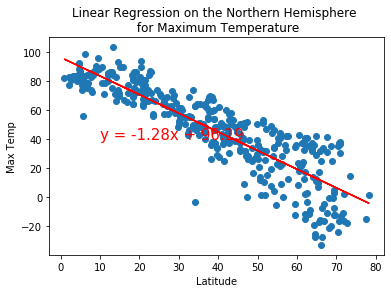

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
r_title = "Linear Regression on the Northern Hemisphere \n for Maximum Temperature"
# Call the function.
plot_linear_regression(x_values, y_values, r_title,'Max Temp',(10,40))

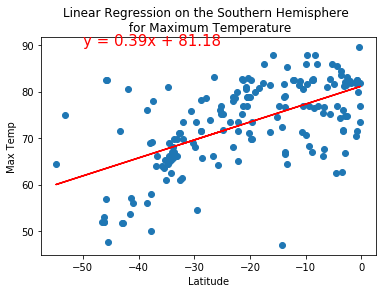

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
r_title = "Linear Regression on the Southern Hemisphere \n for Maximum Temperature"
# Call the function.
plot_linear_regression(x_values, y_values, r_title, 'Max Temp',(-50,90))

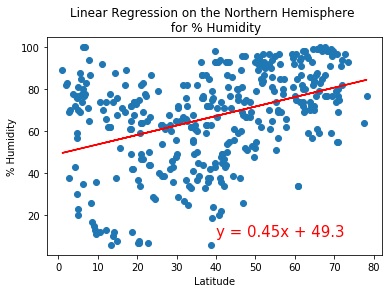

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

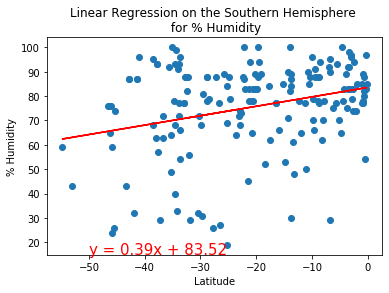

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

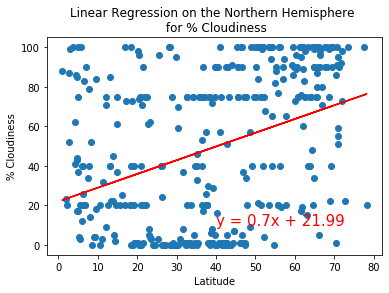

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

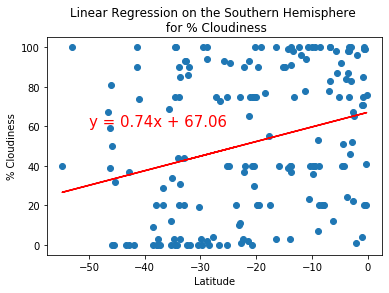

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

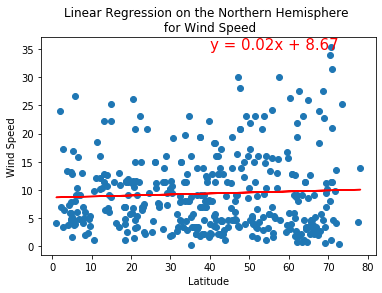

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

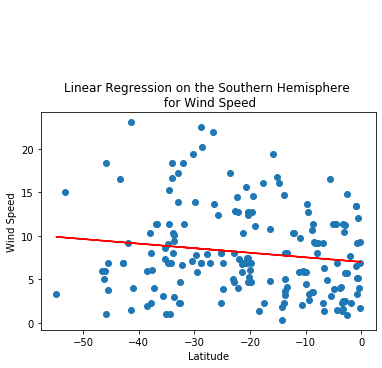

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))